In [62]:
import HNLCalc
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib
import random ### DELETE LATER 
import math

In [54]:
hnl = HNLCalc.HeavyNeutralLepton(ve=1, vmu=0, vtau=0)
utility = HNLCalc.Utility()
production = HNLCalc.Production()
masses =  np.logspace(-1,1, 401)

## HNL Decay

In [55]:
hnl.get_br_and_ctau(mpts = masses)

In [56]:
print(f"Active Decay Modes:\n")
for channel in hnl.modes_active.keys():
    string = ""
    if channel not in ['nuqq','lud']:   
        for mode in hnl.modes_active[channel]:
            string += f" {mode},"
        print(f"{channel}: "+string[:-1]+"\n")        

Active Decay Modes:

null:  ('nu', 'e', 'anti_e'), ('nu', 'mu', 'anti_mu'), ('nu', 'tau', 'anti_tau')

llnu:  ('e', 'anti_mu', 'nu'), ('mu', 'anti_e', 'nu'), ('e', 'anti_tau', 'nu'), ('tau', 'anti_e', 'nu')

nu3:  ('nu', 'nu', 'nu')

nuP:  ('nu', 'pi0'), ('nu', 'eta'), ('nu', 'etap')

lP:  ('e', 'pi+'), ('anti_e', 'anti_pi+'), ('e', 'K+'), ('anti_e', 'anti_K+'), ('e', 'D+'), ('anti_e', 'anti_D+'), ('e', 'Ds+'), ('anti_e', 'anti_Ds+')

nuV:  ('nu', 'rho0'), ('nu', 'omega'), ('nu', 'phi')

lV:  ('e', 'rho+'), ('anti_e', 'anti_rho+'), ('e', 'K+star'), ('anti_e', 'anti_K+star')

lhad:  ('e', 'had'), ('anti_e', 'had')

nuhad:  ('nu', 'had')



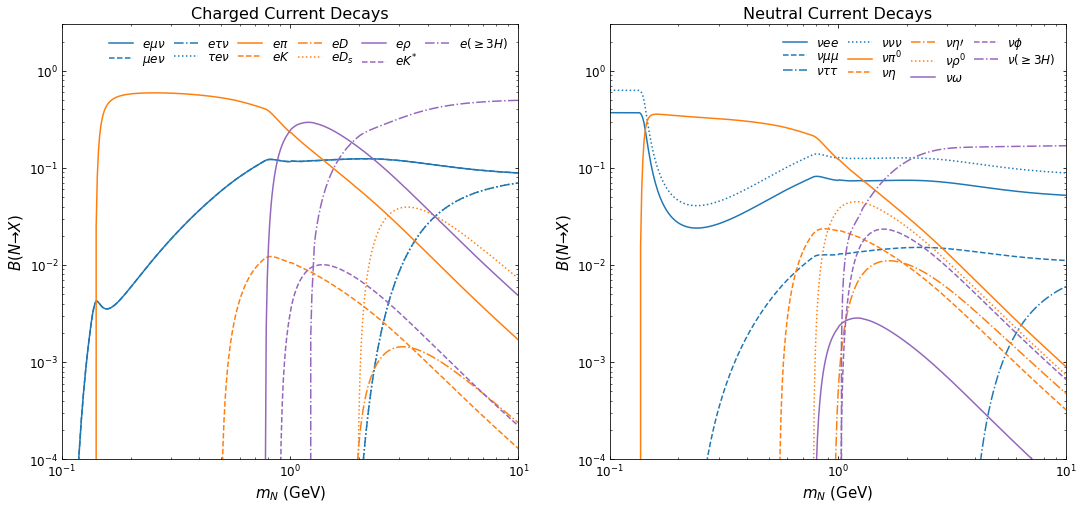

In [57]:
fig,(ax,ax1) = plt.subplots(1,2)

custom_cycler = (cycler(color=['tab:blue','tab:orange','tab:purple', 'y', 'r','green','c'])* 
                 cycler(ls=['-', '--', '-.', 'dotted']))

ax.set_prop_cycle(custom_cycler)
ax1.set_prop_cycle(custom_cycler)

fig.set_size_inches(18,8, forward=True)

ax.set_title(r"Charged Current Decays",fontsize = 16)
ax1.set_title(r"Neutral Current Decays",fontsize = 16)

for a in [ax,ax1]:
    
    a.set(xscale = 'log', yscale = 'log',xlim=(1e-1,1e1),ylim = (1e-4,3))
   
    a.tick_params(axis='both', which='major',direction='in',top=True,right=True)
    
    a.tick_params(axis='both', which='minor',direction='in',top=True,right=True)
    
    a.set_xlabel(r"$m_N$ (GeV)",fontsize=15)
    a.set_ylabel(r"$B(N\to X)$",fontsize=15)
    a.tick_params(axis='x', labelsize=12)
    a.tick_params(axis='y', labelsize=12)
    
for channel in ['null','nu3','nuP','nuV','nuhad']:
    for mode in hnl.modes_active[channel]:
        label = r"" 
        for p in mode: label += HNLCalc.plot_labels_neut[p]
        ax1.plot(masses,hnl.model_brs[channel][mode], label =label)


for channel in ['llnu','lP','lV','lhad']:
    for mode in hnl.modes_active[channel]:
        if 'anti_' not in mode[0]:
            label = r"" 
            for p in mode: label += HNLCalc.plot_labels_neut[p]
            ax.plot(masses,2*np.array(hnl.model_brs[channel][mode]), label =label)

ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)
ax1.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=4,labelspacing=0,columnspacing = .65)



fig.savefig(f'HNL Decay Br.pdf',format='pdf',bbox_inches='tight')

## HNL production

In [142]:
#plot full list of channels 
for channel in hnl.get_channels_2body(): print(channel[-1])
for channel in hnl.get_channels_3body(): print(channel[-1])

$D^+ \to e^+ + N$
$D^- \to e^- + N$
$D_s^+ \to e^+ + N$
$D_s^- \to e^- + N$
$B^+ \to + e^+ + N$
$B^- \to + e^- + N$
$B_c^+ \to + e^+ + N$
$B_c^- \to + e^- + N$
$\pi^+ \to + e^+ + N$
$\pi^- \to + e^- + N$
$K^+ \to + e^+ + N$
$K^- \to + e^- + N$
$D^0 \to K^- + e^+ + N$
$D^0 \to K^+ + e^- + N$
$D^+ \to \bar{K}^0 + e^+ + N$
$D^- \to K^0 + e^- + N$
$B^+ \to \bar{D}^0 + e^+ + N$
$B^- \to D^0 + e^- + N$
$B^0 \to D^- + e^+ + N$
$B^0 \to D^+ + e^- + N$
$B^0_s \to D^-_s + e^+ + N$
$B^0_s \to D^+_s + e^- + N$
$B^+_c \to B^0 + e^+ + N$
$B^-_c \to \bar{B}^0 + e^- + N$
$B^+_c \to B^0_s + e^+ + N$
$B^-_c \to \bar{B}^0_s + e^- + N$
$K^0_S \to \pi^+ + e^- + N$
$K^0_S \to \pi^- + e^+ + N$
$K^0_L \to \pi^+ + e^- + N$
$K^0_L \to \pi^- + e^+ + N$
$K^+ \to \pi^0 + e^+ + N$
$K^- \to \pi^0 + e^- + N$
$D_s^+ \to \eta + e^+ + N$
$D_s^- \to \eta + e^- + N$
$D_s^+ \to \eta\' + e^+ + N$
$D_s^- \to \eta\' + e^- + N$
$B^+ \to \pi^0 + e^+ + N$
$B^- \to \pi^0 + e^- + N$
$B^+_c \to D^0 + e^+ + N$
$B^-_c \to \bar{D}^0 +

In [ ]:
## say that we provide evaluateable BR for each channel 

In [145]:
print ("2body decay BR for "+hnl.get_channels_2body()[0][-1])
print (hnl.get_channels_2body()[0][3])

2body decay BR for $D^+ \to e^+ + N$
0.02069860411438542*coupling**2*mass**2*1.86965*(1.-(mass/1.86965)**2 + 2.*(0.0005109989461/1.86965)**2 + (0.0005109989461/mass)**2*(1.-(0.0005109989461/1.86965)**2)) * np.sqrt((1.+(mass/1.86965)**2 - (0.0005109989461/1.86965)**2)**2-4.*(mass/1.86965)**2)


In [148]:
print ("3body decay differential BR d^2sigma/dE/dq2 for "+hnl.get_channels_3body()[0][-1])
print (hnl.get_channels_3body()[0][4])

3body decay differential BR d^2sigma/dE/dq2 for $D^0 \to K^- + e^+ + N$
0.011673409290722718* coupling**2 *(((0.747/(1-q**2/1.96834**2)-0.747/(1-q**2/2.1122**2))*(1.86483**2-0.49367700000000003**2)/q**2)**2*(q**2*(mass**2+0.0005109989461**2)-(mass**2-0.0005109989461**2)**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96834**2)-0.747/(1-q**2/2.1122**2))*(1.86483**2-0.49367700000000003**2)/q**2)*mass**2*(2*1.86483**2-2*0.49367700000000003**2-4*energy*1.86483-0.0005109989461**2+mass**2+q**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96834**2)-0.747/(1-q**2/2.1122**2))*(1.86483**2-0.49367700000000003**2)/q**2)*0.0005109989461**2*(4*energy*1.86483+ 0.0005109989461**2-mass**2-q**2)))+((0.747/(1-q**2/2.1122**2))**2*(4*energy*1.86483+0.0005109989461**2-mass**2-q**2)*(2*1.86483**2-2*0.49367700000000003**2-4*energy*1.86483-0.0005109989461**2+mass**2+q**2)+-(0.747/(1-q**2/2.1122**2))**2*(2*1.86483**2+2*0.49367700000000003**2-q**2)*(q**2-mass**2-0.0005109989461**2)))


In [151]:
print ("3body decay differential BR dsigma/dE for "+hnl.get_channels_3body()[-1][-1])
print (hnl.get_channels_3body()[0][4])

3body decay differential BR dsigma/dE for $\tau^+ \to e^+ + \bar{\nu}_{\tau} + N$
0.011673409290722718* coupling**2 *(((0.747/(1-q**2/1.96834**2)-0.747/(1-q**2/2.1122**2))*(1.86483**2-0.49367700000000003**2)/q**2)**2*(q**2*(mass**2+0.0005109989461**2)-(mass**2-0.0005109989461**2)**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96834**2)-0.747/(1-q**2/2.1122**2))*(1.86483**2-0.49367700000000003**2)/q**2)*mass**2*(2*1.86483**2-2*0.49367700000000003**2-4*energy*1.86483-0.0005109989461**2+mass**2+q**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96834**2)-0.747/(1-q**2/2.1122**2))*(1.86483**2-0.49367700000000003**2)/q**2)*0.0005109989461**2*(4*energy*1.86483+ 0.0005109989461**2-mass**2-q**2)))+((0.747/(1-q**2/2.1122**2))**2*(4*energy*1.86483+0.0005109989461**2-mass**2-q**2)*(2*1.86483**2-2*0.49367700000000003**2-4*energy*1.86483-0.0005109989461**2+mass**2+q**2)+-(0.747/(1-q**2/2.1122**2))**2*(2*1.86483**2+2*0.49367700000000003**2-q**2)*(q**2-mass**2-0.0005109989461**2)))


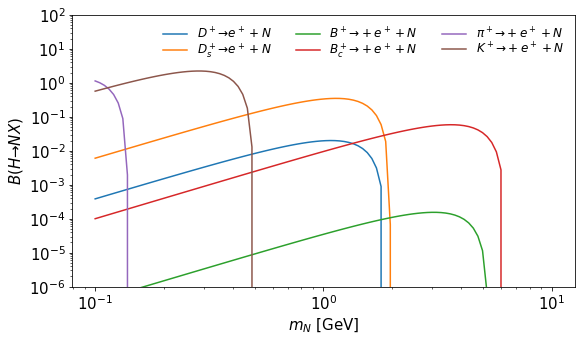

In [152]:
# get subset of channels
production_channels_2body = hnl.get_channels_2body()[::2][:6]
masses, coupling = np.logspace(-1,1,100), 1

# get BR
branching_fractions, latex_labels  = {}, {}
for production_channel in production_channels_2body:
    label, pid0, pid1, br, latex_label = production_channel
    branching_fractions[label] = [eval(br) if mass<hnl.masses(pid0)-hnl.masses(pid1) else 0 for mass in masses]
    latex_labels[label] = latex_label
    
    
# plot
matplotlib.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(9,5))
for label in branching_fractions.keys():
    plt.plot(masses, branching_fractions[label], label=latex_labels[label]) 

plt.ylim(1e-6, 1e2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$m_N$ [GeV]')
plt.ylabel(r'$B(H \to N X)$')
plt.legend(frameon=False, labelspacing=0, ncol=3, fontsize=12, loc='upper right')
plt.show()

In [134]:
##USE THIS CLASS TO REPLACE PRODUCTION CLASS. OR INTEGRATE INTO HNL CLASS DIRECTLY
    
from HNLCalc import Utility 
class Integration(Utility):

    def integrate_3body_br(self, br, mass, m0, m1, m2, coupling=1, nsample=100, integration="dq2dE"):

        if m0<m1+m2+mass: return 0 
        if integration == "dq2dE":
            return self.integrate_3body_br_3body_dq2dE(br, coupling, m0, m1, m2, mass, nsample)
        if integration == "dE":
            return self.integrate_3body_br_3body_dE(br, coupling, m0, m1, m2, mass, nsample)

    
    def integrate_3body_br_3body_dq2dE(self,br, coupling, m0, m1, m2, mass, nsample):

        #integration boundary
        m3 = mass
        q2min,q2max = (m2+m3)**2,(m0-m1)**2

        #numerical integration
        integral=0
        for i in range(nsample):
            # sample q2
            q2 = random.uniform(q2min,q2max)
            q  = math.sqrt(q2)
            # sample energy
            E2st = (q**2 - m2**2 + m3**2)/(2*q)
            E3st = (m0**2 - q**2 - m1**2)/(2*q)
            m232min = (E2st + E3st)**2 - (np.sqrt(E2st**2 - m3**2) + np.sqrt(E3st**2 - m1**2))**2
            m232max = (E2st + E3st)**2 - (np.sqrt(E2st**2 - m3**2) - np.sqrt(E3st**2 - m1**2))**2
            ENmax = (m232max + q**2 - m2**2 - m1**2)/(2*m0)
            ENmin = (m232min + q**2 - m2**2 - m1**2)/(2*m0)
            energy = random.uniform(ENmin,ENmax)
            #branching fraction
            integral += eval(br)*(q2max-q2min)*(ENmax-ENmin)/float(nsample)

        return integral

    
    def integrate_3body_br_3body_dE(self, br, coupling, m0, m1, m2, mass, nsample):

        #integration boundary
        m3 = mass
        emin, emax = m3, (m0**2+m3**2-(m1+m2)**2)/(2*m0)

        #numerical integration
        integral=0
        for i in range(nsample):
            #sample energy
            energy = random.uniform(emin,emax)
            #branching fraction
            integral += eval(br) * (emax-emin)/float(nsample)

        return integral 

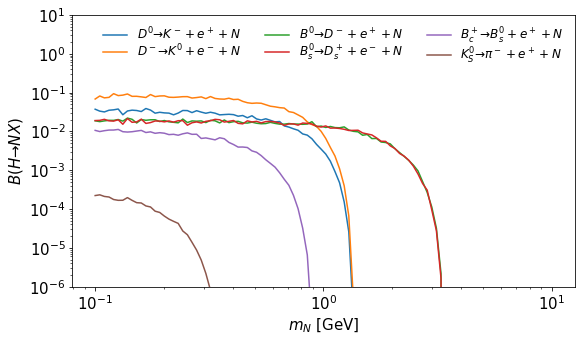

In [153]:
# get channels
production_channels_3body = hnl.get_channels_3body()[::3][:6]
masses, coupling = np.logspace(-1,1,100), 1

# get BR
integrate = Integration()
branching_fractions, latex_labels  = {}, {}
for production_channel in production_channels_3body:
    label, pid0, pid1, pid2 , br, integration, latex_label = production_channel
    m0, m1, m2 = hnl.masses(pid0), hnl.masses(pid1), hnl.masses(pid2)
    branching_fractions[label] = [integrate.integrate_3body_br(
        br, mass, m0, m1, m2, integration=integration) for mass in masses]
    latex_labels[label] = latex_label
    
     
# plot
matplotlib.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(9,5))
for label in branching_fractions.keys():
    plt.plot(masses, branching_fractions[label], label=latex_labels[label]) 

plt.ylim(1e-6, 1e1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$m_N$ [GeV]')
plt.ylabel(r'$B(H \to N X)$')
plt.legend(frameon=False, labelspacing=0, ncol=3, fontsize=12, loc='upper right')
plt.show()